Imports

In [9]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt 
import cv2


## Color Histogram

- Hue, Saturation and Value

In [10]:
def showFeatureHistograms(path, outputPath):

    # Load an image
    image = cv2.imread(path)

    # Convert the image to the HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculate the color histogram
    hist_hue = cv2.calcHist([hsv_image], [0], None, [256], [0, 256])
    hist_saturation = cv2.calcHist([hsv_image], [1], None, [256], [0, 256])
    hist_value = cv2.calcHist([hsv_image], [2], None, [256], [0, 256])

    # Normalize the histograms
    hist_hue = cv2.normalize(hist_hue, hist_hue, 0, 1, cv2.NORM_MINMAX)
    hist_saturation = cv2.normalize(hist_saturation, hist_saturation, 0, 1, cv2.NORM_MINMAX)
    hist_value = cv2.normalize(hist_value, hist_value, 0, 1, cv2.NORM_MINMAX)

    # Plot the histograms
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    plt.plot(hist_hue, color='r')
    plt.title('Hue Histogram')
    plt.xlim([0, 256])

    plt.subplot(132)
    plt.plot(hist_saturation, color='g')
    plt.title('Saturation Histogram')
    plt.xlim([0, 256])

    plt.subplot(133)
    plt.plot(hist_value, color='b')
    plt.title('Value Histogram')
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.savefig(outputPath)


- Individual Colour Representations of Red, Green, Blue values.

In [11]:
def showColorHistograms(path, outputPath):

    # Load an image
    image = cv2.imread(path)

    # Split the image into its RGB channels
    b, g, r = cv2.split(image)

    # Calculate the color histograms for each channel
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

    # Normalize the histograms
    hist_b = cv2.normalize(hist_b, hist_b, 0, 1, cv2.NORM_MINMAX)
    hist_g = cv2.normalize(hist_g, hist_g, 0, 1, cv2.NORM_MINMAX)
    hist_r = cv2.normalize(hist_r, hist_r, 0, 1, cv2.NORM_MINMAX)

    # Plot the histograms
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    plt.plot(hist_b, color='b')
    plt.title('Blue Channel Histogram')
    plt.xlim([0, 256])

    plt.subplot(132)
    plt.plot(hist_g, color='g')
    plt.title('Green Channel Histogram')
    plt.xlim([0, 256])

    plt.subplot(133)
    plt.plot(hist_r, color='r')
    plt.title('Red Channel Histogram')
    plt.xlim([0, 256])

    plt.tight_layout()
    plt.savefig(outputPath)


- Combined Colour Histogram

In [12]:
def showColorHistogramCombined(path, outputPath):

    # Load Image
    image = io.imread(path)
    # tuple to select colors of each channel line
    colors = ("red", "green", "blue")
    channel_ids = (0, 1, 2)

    # create the histogram plot, with three lines, one for each color
    plt.figure()
    plt.xlim([0, 256])
    for channel_id, c in zip(channel_ids, colors):
        histogram, bin_edges = np.histogram(
            image[:, :, channel_id], bins=256, range=(0, 256)
        )
        plt.plot(bin_edges[0:-1], histogram, color=c)

    plt.title("Color Histogram")
    plt.xlabel("Color value")
    plt.ylabel("Pixel count")
    plt.savefig(outputPath)


## Histograms

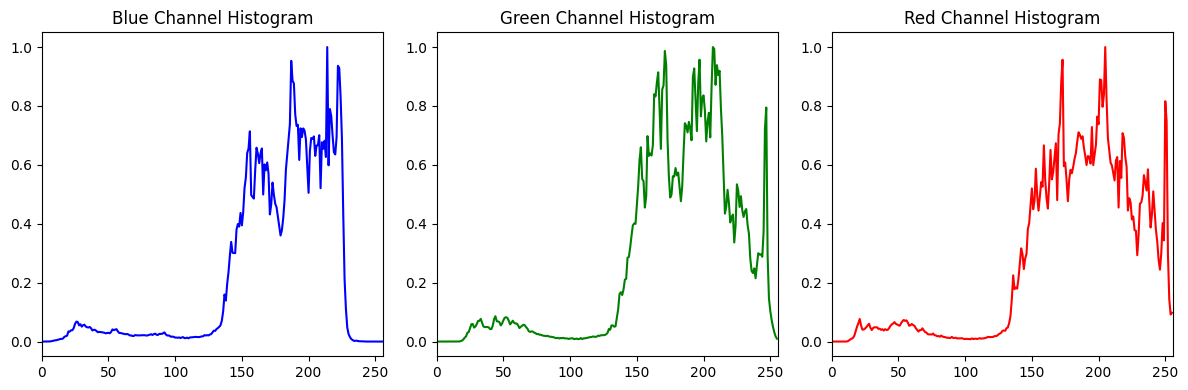

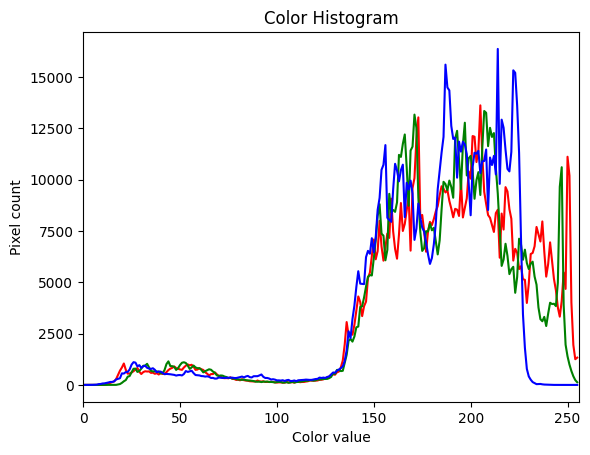

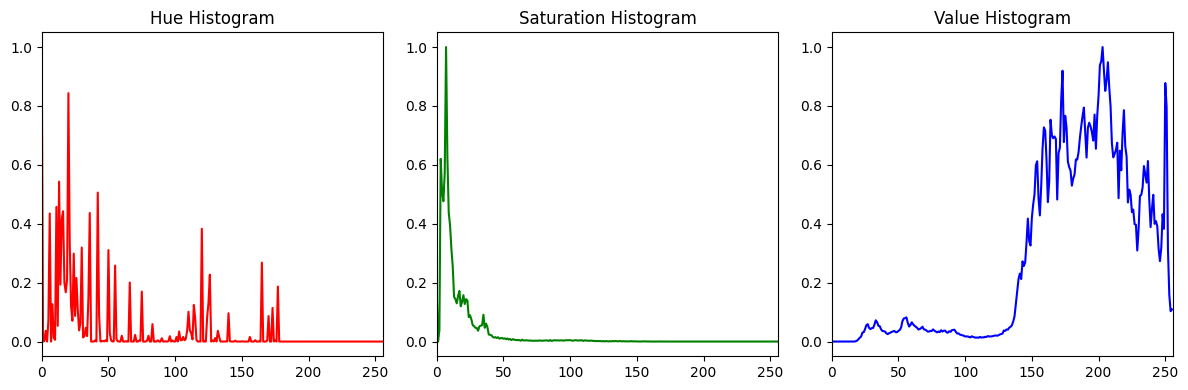

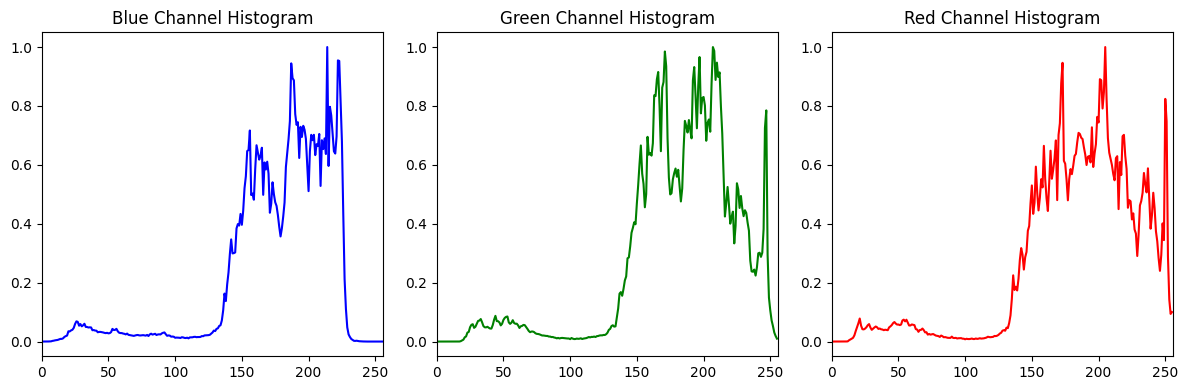

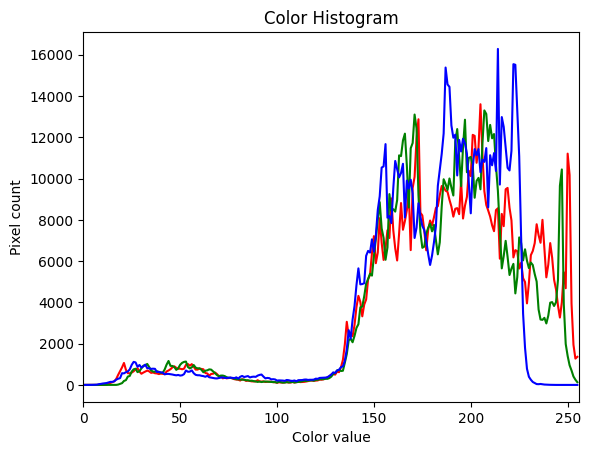

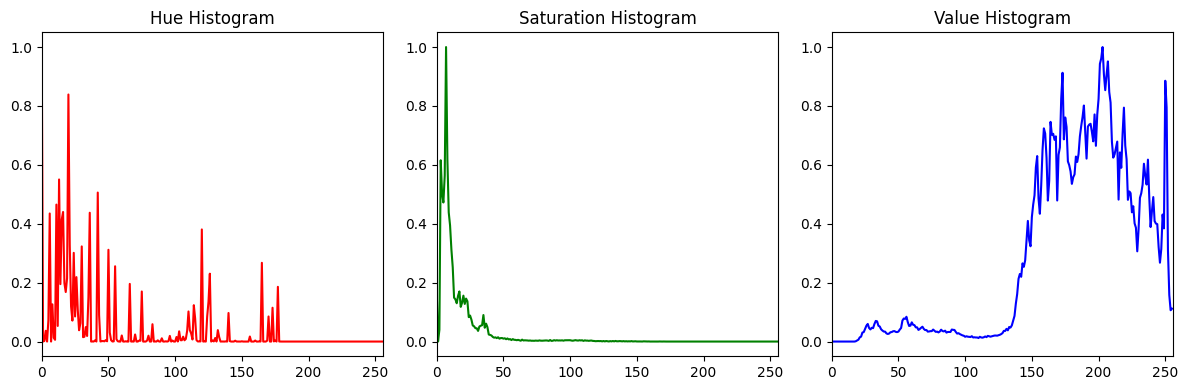

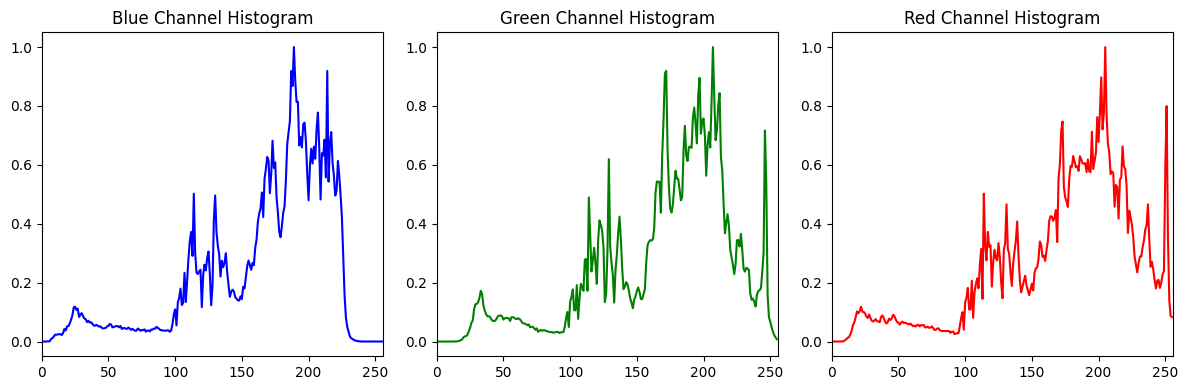

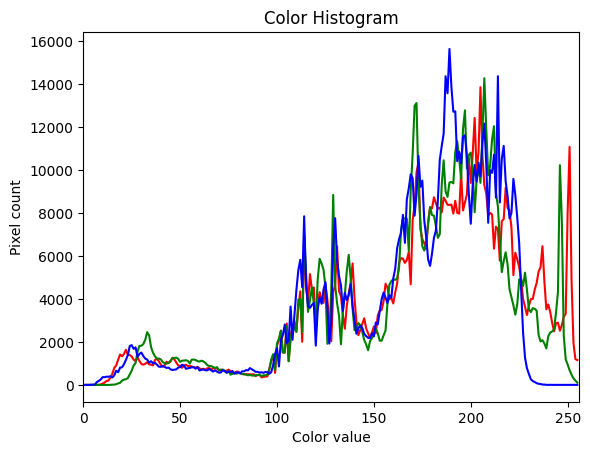

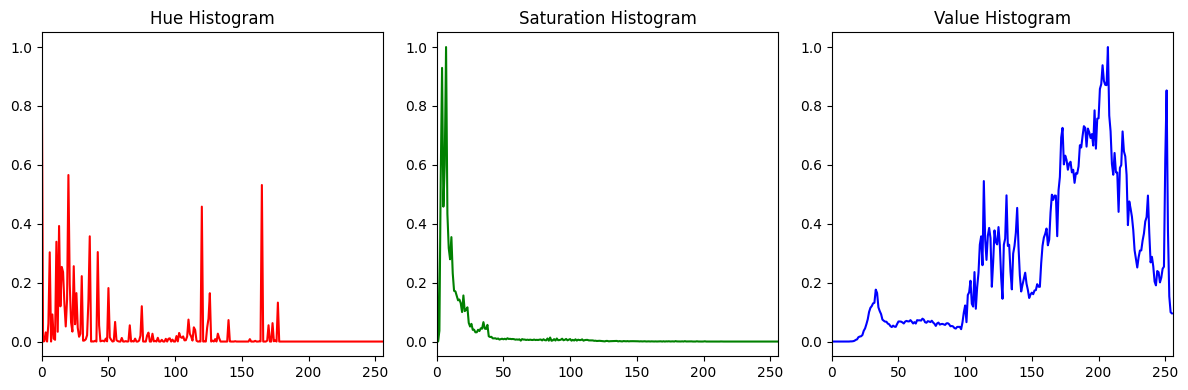

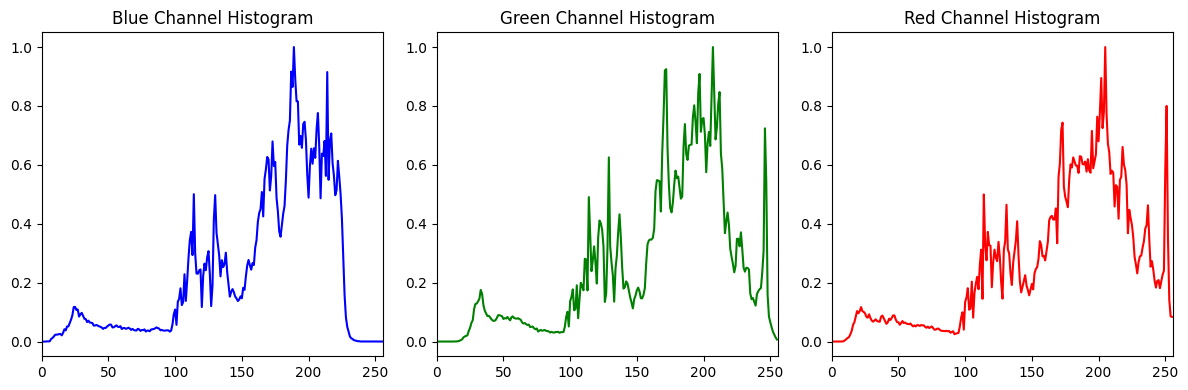

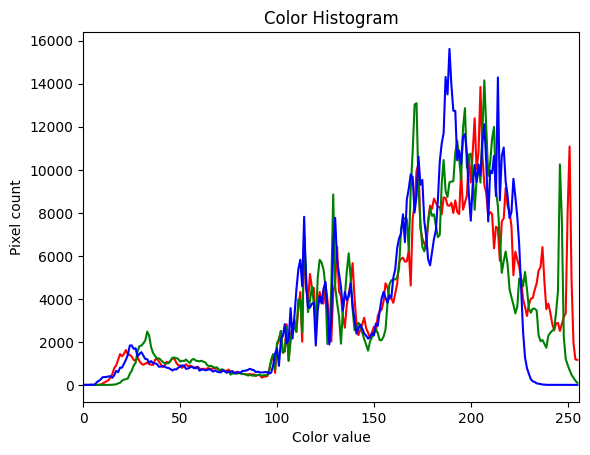

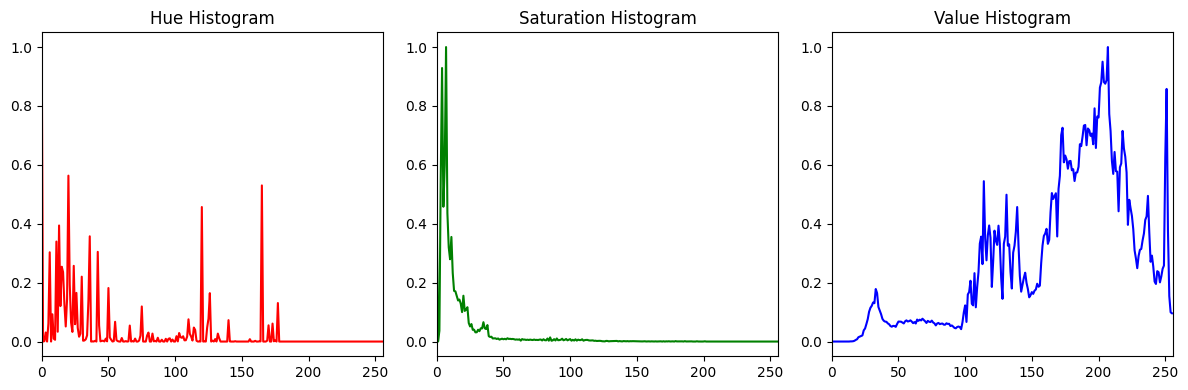

In [13]:
frames_used = [103]

for frame in frames_used:

    # Original Frame Histograms
    showColorHistograms("outputs/video_steg/frames/frame%s.jpg" % frame, "outputs/video_steg/histograms/frame%s_color_histogram.png" % frame)
    showColorHistogramCombined("outputs/video_steg/frames/frame%s.jpg" % frame, "outputs/video_steg/histograms/frame%s_color_histogram_combined.png" % frame)
    showFeatureHistograms("outputs/video_steg/frames/frame%s.jpg" % frame, "outputs/video_steg/histograms/frame%s_feature_histogram.png" % frame)

    # Encoded Frame Histograms
    showColorHistograms("outputs/video_steg/frames/encoded_frame%s.jpg" % frame, "outputs/video_steg/histograms/encoded_frame%s_color_histogram.png" % frame)
    showColorHistogramCombined("outputs/video_steg/frames/encoded_frame%s.jpg" % frame, "outputs/video_steg/histograms/encoded_frame%s_color_histogram_combined.png" % frame)
    showFeatureHistograms("outputs/video_steg/frames/encoded_frame%s.jpg" % frame, "outputs/video_steg/histograms/encoded_frame%s_feature_histogram.png" % frame)